In [1]:
import pandas as pd
%matplotlib inline
import re

In [2]:
refugees_df = pd.read_csv("unhcr_popstats_export_resettlement_all_data.csv")

In [3]:
refugees_df.head()

,Extracted from the UNHCR Population Statistics Reference Database,United Nations High Commissioner for Refugees,Unnamed: 2,Unnamed: 3
0,Date extracted: 2015-10-08 04:11:52 +02:00,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,Country / territory of asylum/residence,Origin,Year,Value
3,Canada,Albania,1959,17
4,Canada,Austria,1959,17


In [4]:
refugees_df.drop(0, inplace=True)


In [5]:
refugees_df.drop(1, inplace=True)


In [6]:
refugees_df.columns = ["Country_Residence", "Origin", "Year", "Count"]

In [7]:
refugees_df.drop(2, inplace=True)

In [8]:
refugees_df["Count"] = refugees_df["Count"].str.replace("*", "0")

In [9]:
refugees_df["Count"] = refugees_df["Count"].astype(int)

In [79]:
refugees_df.head()

,Country_Residence,Origin,Year,Count
3,Canada,Albania,1959,17
4,Canada,Austria,1959,17
5,Canada,Belgium,1959,2
6,Canada,Bulgaria,1959,35
7,Canada,China,1959,2


In [10]:
refugees_df_2016 = refugees_df[refugees_df["Year"] == "2016"]

In [11]:
Countries_residence_count_2016 = refugees_df_2016.groupby("Country_Residence")["Count"].sum().sort_values(ascending = True).reset_index()

In [12]:
Countries_residence_count_2016

,Country_Residence,Count
0,Cambodia,0
1,Monaco,0
2,Latvia,6
3,Estonia,11
4,Hungary,15
5,Japan,18
6,Lithuania,25
7,Brazil,31
8,Czech Rep.,32
9,Rep. of Korea,41


In [13]:
Canada = refugees_df[refugees_df["Country_Residence"] == "Canada"]


In [14]:
Canada.to_csv("Canada_refugees.csv")


In [15]:
Canada

,Country_Residence,Origin,Year,Count
3,Canada,Albania,1959,17
4,Canada,Austria,1959,17
5,Canada,Belgium,1959,2
6,Canada,Bulgaria,1959,35
7,Canada,China,1959,2
8,Canada,Czech Rep.,1959,36
9,Canada,Egypt,1959,5
10,Canada,Estonia,1959,31
11,Canada,Finland,1959,3
12,Canada,France,1959,1


In [16]:
Canada_Year_Count = Canada.groupby("Year")["Count"].sum().reset_index()

In [17]:
Canada_Year_Count.to_csv("Canada_Year_Count.csv")

In [18]:
Canada_Year_Count

,Year,Count
0,1959,3047
1,1960,2329
2,1961,1813
3,1962,1733
4,1963,2024
5,1964,2279
6,1965,2131
7,1966,2058
8,1967,1499
9,1968,9980


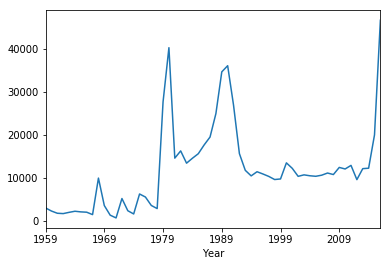

In [19]:
Canada.groupby("Year")["Count"].sum().plot()

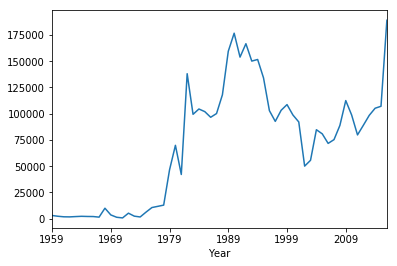

In [20]:
refugees_df.groupby("Year")["Count"].sum().plot()

In [21]:
refugees_df.dtypes

Country_Residence    object
Origin               object
Year                 object
Count                 int64
dtype: object

In [22]:
refugees_df.fillna(0, inplace = True)

In [23]:
refugees_df["Count"] = refugees_df["Count"].astype(int)

In [24]:
refugees_country_sum = refugees_df.groupby(["Country_Residence", "Origin", "Year"])["Count"].sum().reset_index()

In [25]:
refugees_country_sum.replace({'Country_Residence' : {"United States of America": "United States", "United Kingdom of Great Britain and Northern Ireland": "United Kingdom", "Czech Rep.": "Czech Republic", "Rep. of Korea": "South Korea", "Iran (Islamic Rep. of)": "Iran", "Central African Rep.": "Central African Republic"}}, inplace=True)   


In [83]:
refugees_country_sum_2016 = refugees_country_sum[refugees_country_sum["Year"] == "2016"]

In [84]:
refugees_country_sum_2016

,Country_Residence,Origin,Year,Count
41,Australia,Afghanistan,2016,2563
48,Australia,Albania,2016,39
58,Australia,Algeria,2016,15
61,Australia,Angola,2016,0
62,Australia,Argentina,2016,6
79,Australia,Azerbaijan,2016,23
80,Australia,Bahamas,2016,0
81,Australia,Bahrain,2016,9
88,Australia,Bangladesh,2016,433
91,Australia,Belarus,2016,0


In [27]:
countries = pd.read_csv("countries.csv", encoding='latin-1')

In [97]:
countries

,Country,Latitude,Longitude,Name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
5,AL,41.153332,20.168331,Albania
6,AM,40.069099,45.038189,Armenia
7,AN,12.226079,-69.060087,Netherlands Antilles
8,AO,-11.202692,17.873887,Angola
9,AQ,-75.250973,-0.071389,Antarctica


In [85]:
refugees_country_merged_2016 = refugees_country_sum_2016.merge(countries, left_on = "Country_Residence", right_on = "Name", how = "left")


In [91]:
refugees_country_merged_2016.drop("Name", 1, inplace = True)

In [93]:
refugees_country_merged_2016.drop("Country", 1, inplace = True)

In [95]:
refugees_country_merged_2016.columns = ["Country_Residence", "Origin", "Year", "Count", "Lat_Residence", "Lon_Residence"]

In [98]:
refugees_country_merged_2016.replace({'Origin' : {"Dem. Rep. of the Congo": "Congo [DRC]", "United States of America": "United States", "United Kingdom of Great Britain and Northern Ireland": "United Kingdom", "Czech Rep.": "Czech Republic", "Rep. of Korea": "South Korea", "Iran (Islamic Rep. of)": "Iran", "Central African Rep.": "Central African Republic", "Venezuela (Bolivarian Republic of)" : "Venezuela", "Rep. of Moldova": "Moldova", "United Rep. of Tanzania": "Tanzania", "Côte d'Ivoire": "Cte d'Ivoire", "Lao People's Dem. Rep.": "Laos", "Serbia and Kosovo: S/RES/1244 (1999)": "Serbia", "Syrian Arab Rep.": "Syria"}}, inplace=True)   
refugees_country_merged_2016.replace({'Origin' : {"Russian Federation": "Russian", "Viet Nam": "Vietnam", "The former Yugoslav Rep. of Macedonia": "Macedonia [FYROM]", "Dem. People's Rep. of Korea": "North Korea", "China, Hong Kong SAR": "China", "Bolivia (Plurinational State of)": "Bolivia"}}, inplace=True)   


In [100]:
refugees_country_merged_2016.replace({'Origin' : {"Congo": "Congo [Republic]"}}, inplace=True)   


In [102]:
refugees_country_merged_2016.shape

(478, 6)

In [116]:
refugees_country_merged_2016_2 = refugees_country_merged_2016.merge(countries, left_on = "Origin", right_on = "Name", how = "left")



In [104]:
refugees_country_merged_2016_2

(478, 10)

In [117]:
refugees_country_merged_2016_2.drop("Name", 1, inplace = True)
refugees_country_merged_2016_2.drop("Country", 1, inplace = True)

In [118]:
refugees_country_merged_2016_2.columns = ["Country_Residence", "Origin", "Year", "Count", "Lat_Residence", "Lon_Residence", "Lat_Origin", "Lon_Origin"]

In [119]:
refugees_country_merged_2016_2

,Country_Residence,Origin,Year,Count,Lat_Residence,Lon_Residence,Lat_Origin,Lon_Origin
0,Australia,Afghanistan,2016,2563,-25.274398,133.775136,33.939110,67.709953
1,Australia,Albania,2016,39,-25.274398,133.775136,41.153332,20.168331
2,Australia,Algeria,2016,15,-25.274398,133.775136,28.033886,1.659626
3,Australia,Angola,2016,0,-25.274398,133.775136,-11.202692,17.873887
4,Australia,Argentina,2016,6,-25.274398,133.775136,-38.416097,-63.616672
5,Australia,Azerbaijan,2016,23,-25.274398,133.775136,40.143105,47.576927
6,Australia,Bahamas,2016,0,-25.274398,133.775136,25.034280,-77.396280
7,Australia,Bahrain,2016,9,-25.274398,133.775136,25.930414,50.637772
8,Australia,Bangladesh,2016,433,-25.274398,133.775136,23.684994,90.356331
9,Australia,Belarus,2016,0,-25.274398,133.775136,53.709807,27.953389


In [120]:
Syria_2016 = refugees_country_merged_2016_2[refugees_country_merged_2016_2["Origin"] == "Syria"]

In [129]:
refugees_country_merged_2016_2.to_csv("refugees_2016_complete.csv")

In [128]:
refugees_country_merged_2016_2 = refugees_country_merged_2016_2[refugees_country_merged_2016_2["Count"] != 0]

In [127]:
Syria_2016.to_csv("Syria_2016.csv")

In [125]:
Syria_2016 = Syria_2016[Syria_2016["Count"] != 0]

In [126]:
Syria_2016

,Country_Residence,Origin,Year,Count,Lat_Residence,Lon_Residence,Lat_Origin,Lon_Origin
106,Australia,Syria,2016,83,-25.274398,133.775136,34.802075,38.996815
128,Austria,Syria,2016,200,47.516231,14.550072,34.802075,38.996815
131,Belgium,Syria,2016,448,50.503887,4.469936,34.802075,38.996815
194,Canada,Syria,2016,33266,56.130366,-106.346771,34.802075,38.996815
217,Denmark,Syria,2016,236,56.263920,9.501785,34.802075,38.996815
218,Estonia,Syria,2016,11,58.595272,25.013607,34.802075,38.996815
229,Finland,Syria,2016,546,61.924110,25.748151,34.802075,38.996815
246,France,Syria,2016,1190,46.227638,2.213749,34.802075,38.996815
250,Germany,Syria,2016,1215,51.165691,10.451526,34.802075,38.996815
251,Hungary,Syria,2016,15,47.162494,19.503304,34.802075,38.996815


In [ ]:
refugees_country_merged_2016_2.to_

In [87]:
refugees_country_sum_2016.shape

(478, 4)

In [29]:
refugees_country_merged = refugees_country_sum.merge(countries, left_on = "Country_Residence", right_on = "Name", how = "left")


In [30]:
pd.set_option("display.max_rows", 250)

In [31]:
refugees_country_merged.drop("Name", 1, inplace = True)
refugees_country_merged.drop("Country", 1, inplace = True)


In [32]:
refugees_country_merged.columns = ["Country_Residence", "Origin", "Year", "Count", "Lat_Residence", "Lon_Residence"]

In [33]:
refugees_country_merged.replace({'Origin' : {"Congo": "Dem. Rep. of the Congo", "United States of America": "United States", "United Kingdom of Great Britain and Northern Ireland": "United Kingdom", "Czech Rep.": "Czech Republic", "Rep. of Korea": "South Korea", "Iran (Islamic Rep. of)": "Iran", "Central African Rep.": "Central African Republic", "Venezuela (Bolivarian Republic of)" : "Venezuela", "Rep. of Moldova": "Moldova", "United Rep. of Tanzania": "Tanzania", "Côte d'Ivoire": "Cte d'Ivoire", "Lao People's Dem. Rep.": "Laos", "Serbia and Kosovo: S/RES/1244 (1999)": "Serbia", "Syrian Arab Rep.": "Syria"}}, inplace=True)   


In [34]:
refugees_country_merged.replace({'Origin' : {"Russian Federation": "Russian", "Viet Nam": "Vietnam", "The former Yugoslav Rep. of Macedonia": "Macedonia [FYROM]", "Dem. People's Rep. of Korea": "North Korea", "China, Hong Kong SAR": "China", "Bolivia (Plurinational State of)": "Bolivia"}}, inplace=True)   


In [35]:
refugees_country_merged.shape

(9075, 6)

In [36]:
refugees_country_merged["Origin"].value_counts()

Dem. Rep. of the Congo              334
Iraq                                290
Iran                                266
Various/unknown                     251
Afghanistan                         240
Ethiopia                            238
Somalia                             236
Sudan                               218
Syria                               188
Myanmar                             187
Eritrea                             181
Vietnam                             177
China                               168
Russian                             165
Rwanda                              164
Colombia                            159
Sri Lanka                           156
Burundi                             154
Uganda                              147
Serbia                              124
Cambodia                            120
Liberia                             112
Pakistan                            110
Stateless                           103
Laos                                 95


In [37]:
refugees_country_merged_2 = refugees_country_merged.merge(countries, left_on = "Origin", right_on = "Name", how = "left")


In [38]:
refugees_country_merged_2.shape

(9075, 10)

In [39]:
refugees_country_merged_2.drop("Name", 1, inplace = True)
refugees_country_merged_2.drop("Country", 1, inplace = True)


In [40]:
refugees_country_merged_2.columns = ["Country_Residence", "Origin", "Year", "Count", "Lat_Residence", "Lon_Residence", "Lat_Origin", "Lon_Origin"]

In [41]:
refugees_country_merged_sum = refugees_country_merged_2.groupby(["Country_Residence", "Origin", "Lat_Residence", "Lon_Residence", "Lat_Origin", "Lon_Origin"])["Count"].sum().reset_index()



In [42]:
refugees_country_merged_sum.to_csv("refugees_origin_residence.csv")

In [43]:
refugees_country_merged_sum.head()

,Country_Residence,Origin,Lat_Residence,Lon_Residence,Lat_Origin,Lon_Origin,Count
0,Argentina,Colombia,-38.416097,-63.616672,4.570868,-74.297333,218
1,Argentina,Costa Rica,-38.416097,-63.616672,9.748917,-83.753428,1
2,Argentina,Ecuador,-38.416097,-63.616672,-1.831239,-78.183406,6
3,Argentina,El Salvador,-38.416097,-63.616672,13.794185,-88.896530,10
4,Argentina,Guatemala,-38.416097,-63.616672,15.783471,-90.230759,1


In [44]:
refugees_country_merged_sum.groupby("Country_Residence")["Count"].sum()

Country_Residence
Argentina                       236
Australia                    251934
Austria                        1345
Belarus                          14
Belgium                         760
Benin                           121
Brazil                          565
Burkina Faso                     22
Burundi                           1
Cambodia                          3
Cameroon                          6
Canada                       644257
Central African Republic         24
Chile                           220
Czech Republic                   87
Denmark                       18625
Ecuador                           7
El Salvador                       1
Estonia                          11
Finland                       10052
France                         1647
Germany                        5104
Guatemala                         1
Hungary                          17
Iceland                         362
Iran                            191
Ireland                        3171
Italy     

In [45]:
refugees_country_merged_sum.groupby("Origin")["Count"].sum().sort_values(ascending = False)

Origin
Vietnam                             656557
Iraq                                290876
Bosnia and Herzegovina              202516
Somalia                             170114
Laos                                161171
Iran                                154409
Afghanistan                         126894
Cambodia                            116204
Poland                              110848
Bhutan                              102722
Cuba                                 94924
Syria                                89131
Ethiopia                             88136
Sudan                                83870
Serbia                               68722
Ukraine                              53051
Romania                              46153
Liberia                              40706
Eritrea                              39957
Czech Republic                       32334
El Salvador                          26999
Colombia                             23526
Burundi                              20447
Croa

In [46]:
refugees_df_2016.replace({'Country_Residence' : {"United States of America": "United States", "United Kingdom of Great Britain and Northern Ireland": "United Kingdom", "Czech Rep.": "Czech Republic", "Rep. of Korea": "South Korea", "Iran (Islamic Rep. of)": "Iran", "Central African Rep.": "Central African Republic"}}, inplace=True)   


/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3855: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [47]:
refugees_df_2016.shape

(478, 4)

In [48]:
refugees_2016_merged = refugees_df_2016.merge(countries, left_on = "Country_Residence", right_on = "Name", how = "left")


In [49]:
refugees_2016_merged.shape

(478, 8)

In [50]:
refugees_2016_merged.drop("Name", 1, inplace = True)
refugees_2016_merged.drop("Country", 1, inplace = True)


In [51]:
refugees_2016_merged.columns = ["Country_Residence", "Origin", "Year", "Count", "Lat_Residence", "Lon_Residence"]

In [52]:
refugees_2016_merged.replace({'Origin' : {"Brunei Darussalam": "Brunei", "Congo": "Congo [Republic]","Congo": "Congo [DRC]", "Palestinian" : "Palestinian Territories", "United States of America": "United States", "United Kingdom of Great Britain and Northern Ireland": "United Kingdom", "Czech Rep.": "Czech Republic", "Rep. of Korea": "South Korea", "Iran (Islamic Rep. of)": "Iran", "Central African Rep.": "Central African Republic", "Venezuela (Bolivarian Republic of)" : "Venezuela", "Rep. of Moldova": "Moldova", "United Rep. of Tanzania": "Tanzania", "Côte d'Ivoire": "Cte d'Ivoire", "Lao People's Dem. Rep.": "Laos", "Serbia and Kosovo: S/RES/1244 (1999)": "Serbia", "Syrian Arab Rep.": "Syria"}}, inplace=True)   


In [53]:
refugees_2016_merged.replace({'Origin' : {"Russian": "Russia", "Viet Nam": "Vietnam", "The former Yugoslav Rep. of Macedonia": "Macedonia [FYROM]", "Dem. People's Rep. of Korea": "North Korea", "China, Hong Kong SAR": "China", "Bolivia (Plurinational State of)": "Bolivia", "South Sudan": "Sudan", "Myanmar": "Myanmar [Burma]"}}, inplace=True)   


In [54]:
refugees_2016_merged_2 = refugees_2016_merged.merge(countries, left_on = "Origin", right_on = "Name", how = "left")


In [55]:
refugees_2016_merged_2.shape

(478, 10)

In [56]:
refugees_2016_merged_2.drop("Name", 1, inplace = True)
refugees_2016_merged_2.drop("Country", 1, inplace = True)


In [57]:
refugees_2016_merged_2.columns = ["Country_Residence", "Origin", "Year", "Count", "Lat_Residence", "Lon_Residence", "Lat_Origin", "Lon_Origin"]

In [58]:
refugees_2016_merged_2.to_csv("refugees_2016.csv")

In [59]:
refugees_2016_merged_2.loc[refugees_2016_merged_2.Origin == "Cte d'Ivoire", 'Lat_Origin'] = 7.539989
refugees_2016_merged_2.loc[refugees_2016_merged_2.Origin == "Cte d'Ivoire", 'Lon_Origin'] = -5.547080  



In [60]:
refugees_2016_merged_2.dropna(inplace = True)

In [61]:
refugees_2016_merged_2 = refugees_2016_merged_2[refugees_2016_merged_2["Count"] != 0]

In [62]:
Canada_2016 = refugees_2016_merged_2[refugees_2016_merged_2["Country_Residence"] == "Canada"]

In [63]:
Canada_2016 = Canada_2016.sort_values(by = "Count")

In [64]:
Canada_2016.loc[150,'Origin'] = "Congo"

In [65]:
Canada_2016.loc[149,'Origin'] = "Congo"

In [66]:
Canada_2016.loc[149,'Count'] = 1655

In [67]:
Canada_2016.loc[175,'Origin'] = "Myanmar"
Canada_2016.loc[147,'Origin'] = "Cote d'Ivoire"

In [68]:
Canada_2016.shape

(44, 8)

In [69]:
Canada_2016.drop(150, inplace=True)


In [70]:
Canada_2016.loc[149,'Country_Residence'] = "Canada"
Canada_2016.loc[149,'Year'] = 2016
Canada_2016.loc[149,'Lat_Origin'] = -4.038333
Canada_2016.loc[149,'Lon_Origin'] = 21.758664
Canada_2016.loc[149,'Lat_Residence'] = 56.130366
Canada_2016.loc[149,'Lon_Residence'] = -106.346771


In [71]:
Canada_2016 = Canada_2016.sort_values(by = "Count")

In [72]:
Canada_2016.to_csv("Canada_refugees_2016.csv")

In [73]:
Canada_2016.drop(189, inplace=True)


In [74]:
Canada_2016

,Country_Residence,Origin,Year,Count,Lat_Residence,Lon_Residence,Lat_Origin,Lon_Origin
159,Canada,Ghana,2016,5.0,56.130366,-106.346771,7.946527,-1.023194
134,Canada,Angola,2016,6.0,56.130366,-106.346771,-11.202692,17.873887
202,Canada,Yemen,2016,6.0,56.130366,-106.346771,15.552727,48.516388
195,Canada,Thailand,2016,6.0,56.130366,-106.346771,15.870032,100.992541
136,Canada,Armenia,2016,7.0,56.130366,-106.346771,40.069099,45.038189
170,Canada,Cambodia,2016,7.0,56.130366,-106.346771,12.565679,104.990963
177,Canada,Nepal,2016,8.0,56.130366,-106.346771,28.394857,84.124008
194,Canada,Togo,2016,8.0,56.130366,-106.346771,8.619543,0.824782
198,Canada,Uganda,2016,9.0,56.130366,-106.346771,1.373333,32.290275
173,Canada,Sri Lanka,2016,9.0,56.130366,-106.346771,7.873054,80.771797


In [75]:
countries

,Country,Latitude,Longitude,Name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
5,AL,41.153332,20.168331,Albania
6,AM,40.069099,45.038189,Armenia
7,AN,12.226079,-69.060087,Netherlands Antilles
8,AO,-11.202692,17.873887,Angola
9,AQ,-75.250973,-0.071389,Antarctica


In [76]:
refugees_2016_merged_2.to_csv("refugees_2016.csv")